In [675]:
# Import required  libraries
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Generating 100,000 points with standard deviation 0.1

In [676]:
#Generate 2d data randomly with 3 clusters

number_of_point = 100000
dataset = make_blobs(n_samples = number_of_point, 
                    centers = 3, 
                    n_features= 2 , 
                    cluster_std=0.1,#Generate first dataset with standard deviation 0.1
                     shuffle=True,
                    random_state=10)
dataset

(array([[ 2.65628585,  4.95693818],
        [ 2.80571664,  4.83488467],
        [ 0.02770039, -5.45897094],
        ...,
        [-0.10414075, -5.34981447],
        [-0.11700664, -5.41944211],
        [ 5.58644381, -9.56379395]]), array([1, 1, 2, ..., 2, 2, 0]))

# Fitting our KMean model

In [677]:
K_mean =KMeans(n_clusters=3, max_iter=1000,verbose=0, init='k-means++', random_state=0)
K_mean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [678]:
K_mean.fit(dataset[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [679]:
y_km =K_mean.fit_predict(dataset[0])

# Generating the centers

In [680]:
clusters = K_mean.cluster_centers_
clusters

array([[-0.02997894, -5.50376437],
       [ 2.67217722,  4.97512159],
       [ 5.42626818, -9.58472808]])

# Assign  the right cluster center to the right cluster and compute the transmission energy for this dataset.

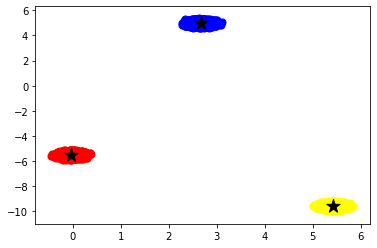

In [681]:
#plotting all clusters with centroids
plt.scatter(dataset[0][y_km== 0,0], dataset[0][y_km== 0,1], s=50, color='red')
plt.scatter(dataset[0][y_km== 1,0], dataset[0][y_km== 1,1], s=50, color='blue')
plt.scatter(dataset[0][y_km== 2,0], dataset[0][y_km== 2,1], s=50, color='yellow')
#plt.scatter(dataset[0][y_km== 3,0], dataset[0][y_km== 3,1], s=50, color='green')

plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
#plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.show()


In [682]:
##### =================================================================================
##### =================================================================================
##### LOOKING FOR THE ASSIGNMENTS #####
e=[]
f=np.zeros(len(clusters))
h_assign  =[]
h_cluster =[]
A = np.zeros((len(clusters), len(clusters)))
labels = np.arange(0,len(clusters))

for i in range(len(clusters)):
    x = clusters[i][0] 
    y= clusters[i][1]
    for z in range(len(clusters)):
        for j in range(len(dataset[1])): 
            if dataset[1][j] == labels[z] : 
                l = np.sqrt((x - dataset[0][j][0])**2 + ((y - dataset[0][j][1])**2))
                e.append(l)
        f[z] = np.mean(e)
        #print(f)
        e=[]
    A[i,:]=f

for i in range(len(A)):
    h_cluster.append(i)                                      # label
    h_assign.append(np.where(A[i,:]==min(A[i,:]))[0][0])     # corresponding cluster

print("The corresponding cluster centers to the labels", h_cluster, "are", h_assign,".")

The corresponding cluster centers to the labels [0, 1, 2] are [2, 1, 0] .


# Energy transmission function

In [683]:

def energy(clusters,numb,dataset):
    p= 0.4659868018701797# Frequency of transmission
    e =[]
    energ=0
    elec = 5e-8     #E_{elec}
    epsfs= 1e-11  #\epsilon_{fs}
    epsamp = 1.3e-15  #\epsilon_{amp}
    d0 = 10  #d_{0}
    l= 0
    distance=0
    l=0
    y = 0
    x= 0
    l = 0
    mean_dist= []
    e= []
#Compute the distance from each source node to the cetroid of the cluster whioch is the fog
    for i in range(len(clusters)): # i represent the class. W iterate over the cluster centers 
            x = clusters[i][0] # takes  value of x for line i
            y= clusters[i][1] # Takes value of y for line i
            for j in range(len(dataset[1])): # Iterate over number the of points of my dataset
                if dataset[1][j] ==h_assign[i] : #Test if the jth elt of dxy is equal to the class i of the cluster
                    l = np.sqrt((x - dataset[0][j][0])**2 + # the first zero selects all the 1st elts of my dataset, j select the line, 0 selects x
                               ((y - dataset[0][j][1])**2))#the first zero selects all the 1st elts of my dataset, j select the line, 1 selects y
                    
                    e.append(l)
                        
                l=0

            mean_dist.append(np.mean(e))
            e = []
            #print(mean_dist)
            distance = np.mean(mean_dist)# Here we have the mean distance from source nodes in a given cluster  to the fog 
#Conditions in the energy equation implemetation
            if distance < d0 : 
                energ= p/numb*(elec + epsfs*distance**2)
            else:
                energ= p/numb*(elec + epsamp*distance**4)
                energ
                l=0
    return energ

def energy_data(num_cluster,dataset,clusters):
    total_energy = []
    l= 0
    e=[]
    for i in range (1,numb_cluster+1):
        K_mean =KMeans(n_clusters=i, 
                       max_iter=1000,
                       verbose=0, init='k-means++')
        model = K_mean.fit(dataset[0])
        clusters = K_mean.cluster_centers_ #Generates the coordinates of the centroids 
        l = energy(clusters, i,dataset)
        e.append(i)
        e.append(l)
        total_energy.append(e)
        l = 0
        e=[]
    return total_energy



In [684]:
ty=[]
numb_cluster = 3 #Initializing the number of clusters
ty=energy_data(numb_cluster,dataset,clusters)
ty

[[1, 2.3355041911599075e-08],
 [2, 1.1656941433262009e-08],
 [3, 7.769212543257476e-09]]

In [685]:
#Here we store the energy computed  in y an the corresponding number of clusters in x to generate a plot.
k=len(ty)
p=[]
q=[]
for i in range(k):
    p.append(ty[i][0])
    q.append(ty[i][1]*1e9)
#plot(total_energy[:][])
p,q

([1, 2, 3], [23.355041911599077, 11.65694143326201, 7.769212543257476])

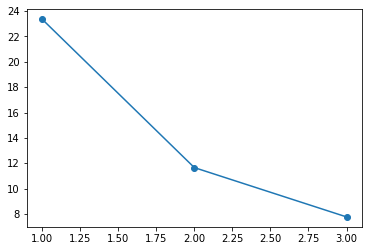

In [686]:
plt.plot(p,q, marker = 'o')
#plt.plot(r,s, marker = 'o')
#plt.plot(t,u, marker = 'o')
plt.show()


# Generating dataset 2 with 100,000 points with standard deviation 20 and compute the transmission energy.

In [687]:
#Generate 2d data randomly with 3 clusters

number_of_point = 100000

dataset1 = make_blobs(n_samples = number_of_point, 
                    centers = 3, 
                    n_features= 2 , 
                    cluster_std=20,#Generate first dataset with standard deviation 0.1
                     shuffle=True,
                    random_state=10)
dataset1

(array([[ -0.66280479,   1.14818339],
        [ 29.22335395, -23.26251772],
        [ 11.4821689 ,   3.51516234],
        ...,
        [-14.886058  ,  25.34645754],
        [-17.45923661,  11.42092808],
        [ 37.43260165,  -5.35154799]]), array([1, 1, 2, ..., 2, 2, 0]))

In [688]:
K_mean =KMeans(n_clusters=3, max_iter=1000,verbose=0, init='k-means++', random_state=0)
K_mean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [689]:
K_mean.fit(dataset1[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [690]:
clusters1 = K_mean.cluster_centers_
clusters1

array([[ 18.68479479, -17.42089536],
       [  5.79154556,  17.777267  ],
       [-17.01007622, -11.09981982]])

In [691]:
y_km =K_mean.fit_predict(dataset1[0])

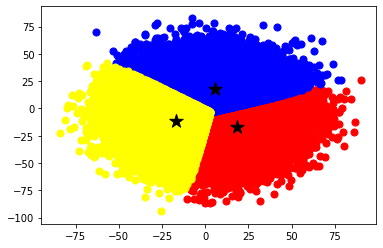

In [692]:
#plotting all clusters with centroids
plt.scatter(dataset1[0][y_km== 0,0], dataset1[0][y_km== 0,1], s=50, color='red')
plt.scatter(dataset1[0][y_km== 1,0], dataset1[0][y_km== 1,1], s=50, color='blue')
plt.scatter(dataset1[0][y_km== 2,0], dataset1[0][y_km== 2,1], s=50, color='yellow')
#plt.scatter(dataset[0][y_km== 3,0], dataset[0][y_km== 3,1], s=50, color='green')

plt.scatter(clusters1[0][0], clusters1[0][1], marker='*', s=200, color='black')
plt.scatter(clusters1[1][0], clusters1[1][1], marker='*', s=200, color='black')
plt.scatter(clusters1[2][0], clusters1[2][1], marker='*', s=200, color='black')
#plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.show()


In [693]:
##### =================================================================================
##### =================================================================================
##### LOOKING FOR THE ASSIGNMENTS #####
e=[]
f=np.zeros(len(clusters1))
h_assign  =[]
h_cluster =[]
A = np.zeros((len(clusters1), len(clusters1)))
labels = np.arange(0,len(clusters1))

for i in range(len(clusters1)):
    x = clusters1[i][0] 
    y= clusters1[i][1]
    for z in range(len(clusters1)):
        for j in range(len(dataset1[1])): 
            if dataset1[1][j] == labels[z] : 
                l = np.sqrt((x - dataset1[0][j][0])**2 + ((y - dataset1[0][j][1])**2))
                e.append(l)
        f[z] = np.mean(e)
        #print(f)
        e=[]
    A[i,:]=f

for i in range(len(A)):
    h_cluster.append(i)                                      # label
    h_assign.append(np.where(A[i,:]==min(A[i,:]))[0][0])     # corresponding cluster

print("The corresponding cluster centers to the labels", h_cluster, "are", h_assign,".")

The corresponding cluster centers to the labels [0, 1, 2] are [0, 1, 2] .


In [694]:

def energy(clusters,numb,dataset):
    p= 0.4659868018701797# Frequency of transmission
    e =[]
    energ=0
    elec = 5e-8     #E_{elec}
    epsfs= 1e-11  #\epsilon_{fs}
    epsamp = 1.3e-15  #\epsilon_{amp}
    d0 = 10  #d_{0}
    l= 0
    distance=0
    l=0
    y = 0
    x= 0
    l = 0
    mean_dist= []
    e= []
#Compute the distance from each source node to the cetroid of the cluster whioch is the fog
    for i in range(len(clusters)): # i represent the class. W iterate over the cluster centers 
            x = clusters[i][0] # takes  value of x for line i
            y= clusters[i][1] # Takes value of y for line i
            for j in range(len(dataset[1])): # Iterate over number the of points of my dataset
                if dataset[1][j] ==h_assign[i] : #Test if the jth elt of dxy is equal to the class i of the cluster
                    l = np.sqrt((x - dataset[0][j][0])**2 + # the first zero selects all the 1st elts of my dataset, j select the line, 0 selects x
                               ((y - dataset[0][j][1])**2))#the first zero selects all the 1st elts of my dataset, j select the line, 1 selects y
                    
                    e.append(l)
                        
                l=0

            mean_dist.append(np.mean(e))
            e = []
            #print(mean_dist)
            distance = np.mean(mean_dist)# Here we have the mean distance from source nodes in a given cluster  to the fog 
#Conditions in the energy equation implemetation
            if distance < d0 : 
                energ= p/numb*(elec + epsfs*distance**2)
            else:
                energ= p/numb*(elec + epsamp*distance**4)
                energ
                l=0
    return energ

def energy_data(num_cluster,dataset,clusters):
    total_energy = []
    l= 0
    e=[]
    for i in range (1,numb_cluster+1):
        K_mean =KMeans(n_clusters=i, 
                       max_iter=1000,
                       verbose=0, init='k-means++')
        model = K_mean.fit(dataset[0])
        clusters = K_mean.cluster_centers_ #Generates the coordinates of the centroids 
        l = energy(clusters, i,dataset)
        e.append(i)
        e.append(l)
        total_energy.append(e)
        l = 0
        e=[]
    return total_energy



In [695]:
tz=[]
numb_cluster = 3 #Initializing the number of clusters
tz=energy_data(numb_cluster,dataset1,clusters1)
tz

[[1, 2.3565828398321805e-08],
 [2, 1.1797004975886902e-08],
 [3, 8.02372155879917e-09]]

In [696]:
#Here we store the energy computed  in y an the corresponding number of clusters in x to generate a plot.
k=len(tz)
r=[]
s=[]
for i in range(k):
    r.append(tz[i][0])
    s.append(tz[i][1]*1e9)
#plot(total_energy[:][])
r,s

([1, 2, 3], [23.565828398321806, 11.797004975886903, 8.023721558799169])

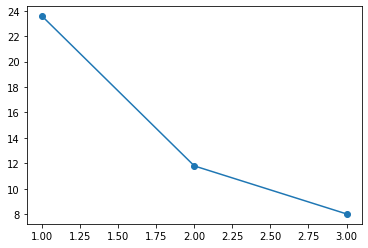

In [722]:
#plt.plot(p,q, marker = 'o')
plt.plot(r,s, marker = 'o')
#plt.plot(t,u, marker = 'o')
plt.show()

# Generating dataset3 containing 100,000 points with standard deviation 40 and compute the energy

In [698]:
#Generate 2d data randomly with 3 clusters

number_of_point = 100000
dataset = make_blobs(n_samples = number_of_point, 
                    centers = 3, 
                    n_features= 2 , 
                    cluster_std=40,#Generate first dataset with standard deviation 0.1
                     shuffle=True,
                    random_state=10)
dataset

(array([[ -3.99857428,  -2.67971087],
        [ 55.7737432 , -51.50111309],
        [ 22.99419756,  12.53439176],
        ...,
        [-29.74225625,  56.19698216],
        [-34.88861347,  28.34592326],
        [ 69.43879044,  -1.11813497]]), array([1, 1, 2, ..., 2, 2, 0]))

In [699]:
K_mean =KMeans(n_clusters=3, max_iter=1000,verbose=0, init='k-means++', random_state=0)
K_mean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [700]:
K_mean.fit(dataset[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [701]:
clusters = K_mean.cluster_centers_
clusters

array([[-33.92307407, -24.09044949],
       [ 38.1472602 , -24.5158388 ],
       [  2.8354701 ,  38.40246956]])

In [702]:
y_km =K_mean.fit_predict(dataset[0])

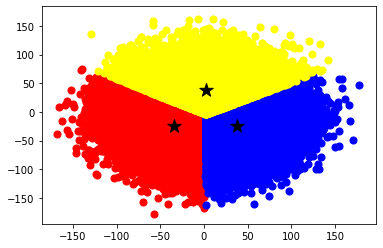

In [703]:
#plotting all clusters with centroids
plt.scatter(dataset[0][y_km== 0,0], dataset[0][y_km== 0,1], s=50, color='red')
plt.scatter(dataset[0][y_km== 1,0], dataset[0][y_km== 1,1], s=50, color='blue')
plt.scatter(dataset[0][y_km== 2,0], dataset[0][y_km== 2,1], s=50, color='yellow')
#plt.scatter(dataset[0][y_km== 3,0], dataset[0][y_km== 3,1], s=50, color='green')

plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
#plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.show()


In [704]:
##### =================================================================================
##### =================================================================================
##### LOOKING FOR THE ASSIGNMENTS #####
e=[]
f=np.zeros(len(clusters))
h_assign  =[]
h_cluster =[]
A = np.zeros((len(clusters), len(clusters)))
labels = np.arange(0,len(clusters))

for i in range(len(clusters)):
    x = clusters[i][0] 
    y= clusters[i][1]
    for z in range(len(clusters)):
        for j in range(len(dataset[1])): 
            if dataset[1][j] == labels[z] : 
                l = np.sqrt((x - dataset[0][j][0])**2 + ((y - dataset[0][j][1])**2))
                e.append(l)
        f[z] = np.mean(e)
        #print(f)
        e=[]
    A[i,:]=f

for i in range(len(A)):
    h_cluster.append(i)                                      # label
    h_assign.append(np.where(A[i,:]==min(A[i,:]))[0][0])     # corresponding cluster

print("The corresponding cluster centers to the labels", h_cluster, "are", h_assign,".")

The corresponding cluster centers to the labels [0, 1, 2] are [2, 0, 1] .


In [705]:

def energy(clusters,numb,dataset):
    p= 0.4659868018701797# Frequency of transmission
    e =[]
    energ=0
    elec = 5e-8     #E_{elec}
    epsfs= 1e-11  #\epsilon_{fs}
    epsamp = 1.3e-15  #\epsilon_{amp}
    d0 = 10  #d_{0}
    l= 0
    distance=0
    l=0
    y = 0
    x= 0
    l = 0
    mean_dist= []
    e= []
#Compute the distance from each source node to the cetroid of the cluster whioch is the fog
    for i in range(len(clusters)): # i represent the class. W iterate over the cluster centers 
            x = clusters[i][0] # takes  value of x for line i
            y= clusters[i][1] # Takes value of y for line i
            for j in range(len(dataset[1])): # Iterate over number the of points of my dataset
                if dataset[1][j] ==h_assign[i] : #Test if the jth elt of dxy is equal to the class i of the cluster
                    l = np.sqrt((x - dataset[0][j][0])**2 + # the first zero selects all the 1st elts of my dataset, j select the line, 0 selects x
                               ((y - dataset[0][j][1])**2))#the first zero selects all the 1st elts of my dataset, j select the line, 1 selects y
                    
                    e.append(l)
                        
                l=0

            mean_dist.append(np.mean(e))
            e = []
            #print(mean_dist)
            distance = np.mean(mean_dist)# Here we have the mean distance from source nodes in a given cluster  to the fog 
#Conditions in the energy equation implemetation
            if distance < d0 : 
                energ= p/numb*(elec + epsfs*distance**2)
            else:
                energ= p/numb*(elec + epsamp*distance**4)
                energ
                l=0
    return energ

def energy_data(num_cluster,dataset,clusters):
    total_energy = []
    l= 0
    e=[]
    for i in range (1,numb_cluster+1):
        K_mean =KMeans(n_clusters=i, 
                       max_iter=1000,
                       verbose=0, init='k-means++')
        model = K_mean.fit(dataset[0])
        clusters = K_mean.cluster_centers_ #Generates the coordinates of the centroids 
        l = energy(clusters, i,dataset)
        e.append(i)
        e.append(l)
        total_energy.append(e)
        l = 0
        e=[]
    return total_energy



In [706]:
tw=[]
numb_cluster = 3 #Initializing the number of clusters
tw=energy_data(numb_cluster,dataset,clusters)
tw

[[1, 2.7144127986499052e-08],
 [2, 1.4971070469102494e-08],
 [3, 1.1192040285802737e-08]]

In [707]:
#Here we store the energy computed  in y an the corresponding number of clusters in x to generate a plot.
k=len(tw)
t=[]
u=[]
for i in range(k):
    t.append(tw[i][0])
    u.append(tw[i][1]*1e9)
#plot(total_energy[:][])
t,u

([1, 2, 3], [27.14412798649905, 14.971070469102495, 11.192040285802737])

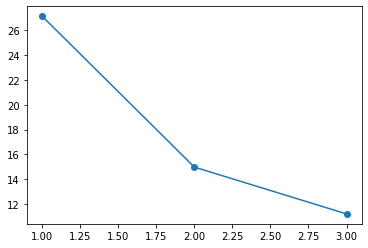

In [708]:
#plt.plot(p,q, marker = 'o',label='dataset1: 100000')
#plt.plot(r,s, marker = 'o', label='dataset2: 10000')
plt.plot(t,u, marker = 'o', label='dataset3: 1000')
#plt.legend()
plt.show()

# Generating dataset4 with standard deviation 60 and compute the energy

In [730]:
#Generate 2d data randomly with 3 clusters

number_of_point = 100000
dataset = make_blobs(n_samples = number_of_point, 
                    centers = 3, 
                    n_features= 2 , 
                    cluster_std=60,#Generate first dataset with standard deviation 0.1
                     shuffle=True,
                    random_state=10)
dataset

(array([[ -7.33434377,  -6.50760513],
        [ 82.32413246, -79.73970847],
        [ 34.50622622,  21.55362119],
        ...,
        [-44.59845449,  87.04750679],
        [-52.31799033,  45.27091843],
        [101.44497922,   3.11527805]]), array([1, 1, 2, ..., 2, 2, 0]))

In [731]:
K_mean =KMeans(n_clusters=3, max_iter=1000,verbose=0, init='k-means++', random_state=0)
K_mean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [732]:
K_mean.fit(dataset[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [733]:
clusters = K_mean.cluster_centers_
clusters

array([[ 55.06562383, -36.13864639],
       [-52.93212547, -32.7649326 ],
       [  4.63508089,  58.91060269]])

In [734]:
y_km =K_mean.fit_predict(dataset[0])

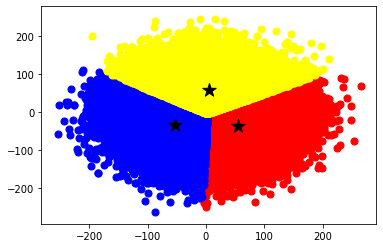

In [735]:
#plotting all clusters with centroids
plt.scatter(dataset[0][y_km== 0,0], dataset[0][y_km== 0,1], s=50, color='red')
plt.scatter(dataset[0][y_km== 1,0], dataset[0][y_km== 1,1], s=50, color='blue')
plt.scatter(dataset[0][y_km== 2,0], dataset[0][y_km== 2,1], s=50, color='yellow')
#plt.scatter(dataset[0][y_km== 3,0], dataset[0][y_km== 3,1], s=50, color='green')

plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
#plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.show()


In [736]:
##### =================================================================================
##### =================================================================================
##### LOOKING FOR THE ASSIGNMENTS #####
e=[]
f=np.zeros(len(clusters))
h_assign  =[]
h_cluster =[]
A = np.zeros((len(clusters), len(clusters)))
labels = np.arange(0,len(clusters))

for i in range(len(clusters)):
    x = clusters[i][0] 
    y= clusters[i][1]
    for z in range(len(clusters)):
        for j in range(len(dataset[1])): 
            if dataset[1][j] == labels[z] : 
                l = np.sqrt((x - dataset[0][j][0])**2 + ((y - dataset[0][j][1])**2))
                e.append(l)
        f[z] = np.mean(e)
        #print(f)
        e=[]
    A[i,:]=f

for i in range(len(A)):
    h_cluster.append(i)                                      # label
    h_assign.append(np.where(A[i,:]==min(A[i,:]))[0][0])     # corresponding cluster

print("The corresponding cluster centers to the labels", h_cluster, "are", h_assign,".")

The corresponding cluster centers to the labels [0, 1, 2] are [0, 2, 1] .


In [737]:

def energy(clusters,numb,dataset):
    p= 0.4659868018701797# Frequency of transmission
    e =[]
    energ=0
    elec = 5e-8     #E_{elec}
    epsfs= 1e-11  #\epsilon_{fs}
    epsamp = 1.3e-15  #\epsilon_{amp}
    d0 = 10  #d_{0}
    l= 0
    distance=0
    l=0
    y = 0
    x= 0
    l = 0
    mean_dist= []
    e= []
#Compute the distance from each source node to the cetroid of the cluster whioch is the fog
    for i in range(len(clusters)): # i represent the class. W iterate over the cluster centers 
            x = clusters[i][0] # takes  value of x for line i
            y= clusters[i][1] # Takes value of y for line i
            for j in range(len(dataset[1])): # Iterate over number the of points of my dataset
                if dataset[1][j] ==h_assign[i] : #Test if the jth elt of dxy is equal to the class i of the cluster
                    l = np.sqrt((x - dataset[0][j][0])**2 + # the first zero selects all the 1st elts of my dataset, j select the line, 0 selects x
                               ((y - dataset[0][j][1])**2))#the first zero selects all the 1st elts of my dataset, j select the line, 1 selects y
                    
                    e.append(l)
                        
                l=0

            mean_dist.append(np.mean(e))
            e = []
            #print(mean_dist)
            distance = np.mean(mean_dist)# Here we have the mean distance from source nodes in a given cluster  to the fog 
#Conditions in the energy equation implemetation
            if distance < d0 : 
                energ= p/numb*(elec + epsfs*distance**2)
            else:
                energ= p/numb*(elec + epsamp*distance**4)
                energ
                l=0
    return energ

def energy_data(num_cluster,dataset,clusters):
    total_energy = []
    l= 0
    e=[]
    for i in range (1,numb_cluster+1):
        K_mean =KMeans(n_clusters=i, 
                       max_iter=1000,
                       verbose=0, init='k-means++')
        model = K_mean.fit(dataset[0])
        clusters = K_mean.cluster_centers_ #Generates the coordinates of the centroids 
        l = energy(clusters, i,dataset)
        e.append(i)
        e.append(l)
        total_energy.append(e)
        l = 0
        e=[]
    return total_energy



In [738]:
tu=[]
numb_cluster = 3 #Initializing the number of clusters
tu=energy_data(numb_cluster,dataset,clusters)
tu

[[1, 4.283089593715013e-08],
 [2, 2.8165718097801202e-08],
 [3, 2.1689638597333436e-08]]

In [739]:
#Here we store the energy computed  in y an the corresponding number of clusters in x to generate a plot.
k=len(tu)
v=[]
w=[]
for i in range(k):
    v.append(tu[i][0])
    w.append(tu[i][1]*1e9)
#plot(total_energy[:][])
v,w

([1, 2, 3], [42.83089593715013, 28.1657180978012, 21.689638597333435])

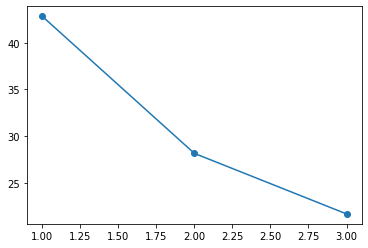

In [740]:
plt.plot(v,w, marker = 'o',label='dataset1: 100000')

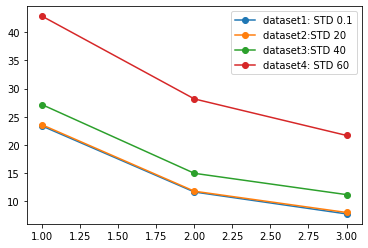

In [741]:
plt.plot(p,q, marker = 'o', label='dataset1: STD 0.1')
plt.plot(r,s, marker = 'o', label='dataset2:STD 20')
plt.plot(t,u, marker = 'o', label='dataset3:STD 40')
plt.plot(v,w, marker = 'o',label='dataset4: STD 60')
plt.legend()
plt.show()

# From the graph above, we can see that increasing the standard deviation of the points increases the energy consumption of the network. I.e a sparsely distributed network consume more energy than a densely distributed network

# Varying the number of data  points, there was no significant difference in transmission energy with respect to the different number of data points as we can see in the plot below.

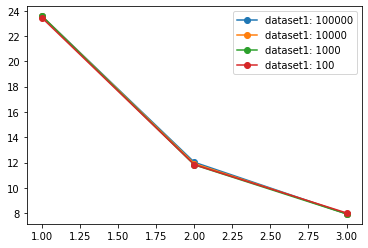

In [674]:
plt.plot(p,q, marker = 'o', label='dataset1: 100000')
plt.plot(r,s, marker = 'o', label='dataset1: 10000')
plt.plot(t,u, marker = 'o', label='dataset1: 1000')
plt.plot(v,w, marker = 'o',label='dataset1: 100')
plt.legend()
plt.show()

# We faced some challenges  to include an area constraint on the data generation. I could not add that restriction in my code without generating complete different set of data. Since all my simulation was done on this datset I decided to vary the standard deeviation which measures ther dispersion of ther dataset relative to its mean. In our code, the higher the standard deviation, the more spread the dataset to incorporate the notion of density distribution.